In [1]:
%cd /home/vale6811/Desktop/EDX/MIT_Micromaster/Statistics
%pwd

/home/vale6811/Desktop/EDX/MIT_Micromaster/Statistics


'/home/vale6811/Desktop/EDX/MIT_Micromaster/Statistics'

In [25]:
from matplotlib import pyplot as plt
import numpy as np

x_data_set = [ 0.28, 0.2, 0.01, 0.8, 0.1 ]
set_length = len(x_data_set)
step = 1/set_length

ordered_x_set = list(x_data_set)
ordered_x_set.sort()

data = { '$X_i$':ordered_x_set,
         '$F_n(X_i)$': 
} 

[(0.01, 0.2), (0.1, 0.4), (0.2, 0.6000000000000001), (0.28, 0.8), (0.8, 1.0)]

In [15]:
x_base=np.arange(0,1,0.001)

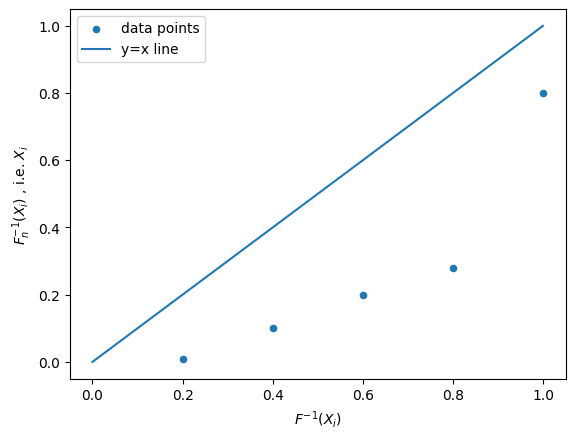

In [51]:
theoretical_set = [(i+1) * step for i,_ in enumerate(ordered_x_set) ]
area = (20)

plt.scatter(theoretical_set, ordered_x_set, s=area, label='data points')
plt.plot(x_base,x_base,label='y=x line')
plt.xlabel('$F^{-1}(X_i)$')
plt.ylabel('$F^{-1}_n(X_i)$ , i.e. $X_i$')
plt.legend()
plt.show()


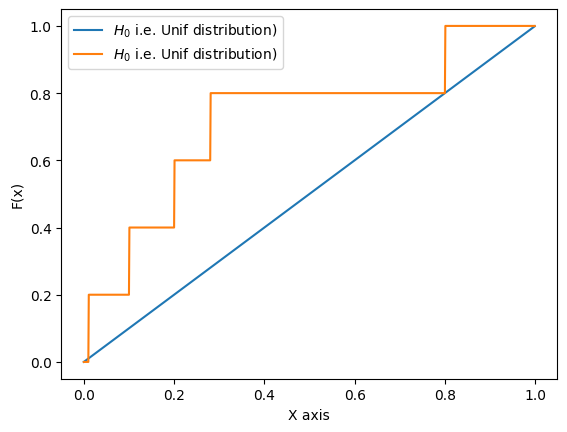

In [97]:
# Here we find Tn for Kolmogorov Smirnov Test
# This is defined as the max over all the dataset between a H0 distribution F_0 that in this case is th uniform distribution
# so we have F_0(x) = x and the values in the discrete F_n(x) from the data which is a piecewise constant function
stepwise_values = []
lower_t = 0
for x in x_base:
    if x > 0.8:  
        stepwise_values.append(1)
    elif x > 0.28:
        stepwise_values.append(0.8)    
    elif x > 0.20:
        stepwise_values.append(0.6)    
    elif x > 0.1:
        stepwise_values.append(0.4)    
    elif x > 0.01:
        stepwise_values.append(0.2)    
    else:
        stepwise_values.append(0)    


plt.plot(x_base,x_base,label='$H_0$ i.e. Unif distribution)')
plt.plot(x_base,stepwise_values,label='$H_0$ i.e. Unif distribution)')
plt.xlabel('X axis')
plt.ylabel('F(x)')
plt.legend()
plt.show()

In [101]:
stepwise_values_set = set(stepwise_values)
collected_max = [ (x-y) for x,y in zip(stepwise_values,ordered_x_set) ]

In [102]:
collected_max



[-0.01, -0.1, -0.2, -0.28, -0.8]

In [89]:
len(stepwise_values)


1000

In [109]:
mu = np.array(ordered_x_set).mean()
mu

0.278

In [112]:
variance =  sum([ (x - mu)**2  for x in ordered_x_set ]) / (len(ordered_x_set) -1)
variance

0.09552000000000001

Help on built-in function std:

std(...) method of numpy.ndarray instance
    a.std(axis=None, dtype=None, out=None, ddof=0, keepdims=False, *, where=True)
    
    Returns the standard deviation of the array elements along given axis.
    
    Refer to `numpy.std` for full documentation.
    
    See Also
    --------
    numpy.std : equivalent function



In [117]:
 np.array(ordered_x_set).var()



0.07641600000000001

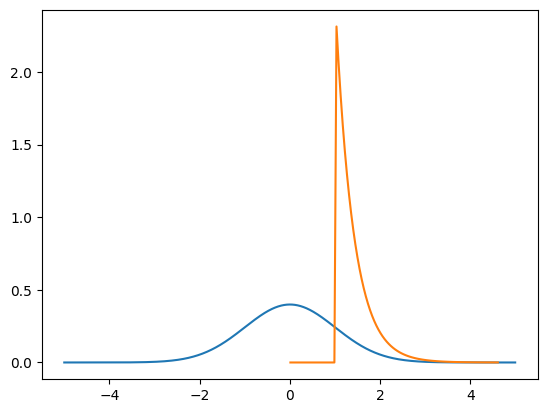

In [139]:
from scipy.stats import norm 
import scipy.stats as stats

# Plot between -10 and 10 with .001 steps. 
x_axis = np.arange(-5, 5, 0.01) 
  
# Calculating mean and standard deviation 
mean = 0
sd = 1
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd)) 

# ppf gives the quartile, here we get the x 
xvalues = np.linspace(stats.expon.ppf(0.01), stats.expon.ppf(0.99), 100)
l = 2.5
y =  stats.expon.pdf(xvalues, loc= 1, scale =1/l)

plt.plot(xvalues, y)

plt.show() 

In [132]:
# ppf gives the quartile, here we get the x 


array([0.01005034, 0.05646569, 0.10288104, 0.14929639, 0.19571174,
       0.2421271 , 0.28854245, 0.3349578 , 0.38137315, 0.4277885 ,
       0.47420386, 0.52061921, 0.56703456, 0.61344991, 0.65986526,
       0.70628062, 0.75269597, 0.79911132, 0.84552667, 0.89194202,
       0.93835738, 0.98477273, 1.03118808, 1.07760343, 1.12401878,
       1.17043414, 1.21684949, 1.26326484, 1.30968019, 1.35609554,
       1.4025109 , 1.44892625, 1.4953416 , 1.54175695, 1.5881723 ,
       1.63458766, 1.68100301, 1.72741836, 1.77383371, 1.82024906,
       1.86666442, 1.91307977, 1.95949512, 2.00591047, 2.05232582,
       2.09874118, 2.14515653, 2.19157188, 2.23798723, 2.28440258,
       2.33081794, 2.37723329, 2.42364864, 2.47006399, 2.51647935,
       2.5628947 , 2.60931005, 2.6557254 , 2.70214075, 2.74855611,
       2.79497146, 2.84138681, 2.88780216, 2.93421751, 2.98063287,
       3.02704822, 3.07346357, 3.11987892, 3.16629427, 3.21270963,
       3.25912498, 3.30554033, 3.35195568, 3.39837103, 3.44478

In [141]:
# simple chi square test
# given K categories with how they should be distributed (true_p or Ho: p)
# and a sample, we get a value to test against a chi square table to see if the data 
# comes from the H0 distribution
true_p = [0.72, 0.07, 0.12, 0.09]
values = [205,26,25,19]
df = len(true_p) - 1
total_n = sum(values)
components = [ ((value/total_n - p)**2)/p  for value, p in zip(values,true_p) ]
T_n = total_n * sum(components)

In [145]:
print(f"Test score is : {T_n} with df {df}")
print(f"P value is : {stats.distributions.chi2.sf(T_n , df)}")

Test score is : 5.889610389610388 with df 3
P value is : 0.11710619130850605
